In [10]:
import pandas as pd
import warnings
from datetime import timedelta
from dateutil.relativedelta import relativedelta
import exploration
import preprocess
import modeling
import evaluation
import analysis
%matplotlib inline 
warnings.simplefilter('ignore')

In [4]:
path = 'D:/UChicago/2019 spring/CAPP30254/assignments/HW3/projects_2012_2013.csv'
index_col = 'projectid'
project = exploration.read_data(path, index_col)
project.head()

,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_metro,school_district,school_county,...,secondary_focus_subject,secondary_focus_area,resource_type,poverty_level,grade_level,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,date_posted,datefullyfunded
projectid,,,,,,,,,,,,,,,,,,,,,
00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,urban,Pershing Elem Network,Cook,...,Visual Arts,Music & The Arts,Supplies,highest poverty,Grades PreK-2,1498.61,31.0,f,4/14/13,5/2/13
0000fa3aa8f6649abab23615b546016d,2a578595fe351e7fce057e048c409b18,3432ed3d4466fac2f2ead83ab354e333,6.409801e+10,34.296596,-119.296596,Ventura,CA,urban,Ventura Unif School District,Ventura,...,Literature & Writing,Literacy & Language,Books,highest poverty,Grades 3-5,282.47,28.0,t,4/7/12,4/18/12
000134f07d4b30140d63262c871748ff,26bd60377bdbffb53a644a16c5308e82,dc8dcb501c3b2bb0b10e9c6ee2cd8afd,6.227100e+10,34.078625,-118.257834,Los Angeles,CA,urban,Los Angeles Unif Sch Dist,Los Angeles,...,Social Sciences,History & Civics,Technology,high poverty,Grades 3-5,1012.38,56.0,f,1/30/12,4/15/12
0001f2d0b3827bba67cdbeaa248b832d,15d900805d9d716c051c671827109f45,8bea7e8c6e4279fca6276128db89292e,3.600090e+11,40.687286,-73.988217,Brooklyn,NY,urban,New York City Dept Of Ed,Kings (Brooklyn),...,NaN,NaN,Books,high poverty,Grades PreK-2,175.33,23.0,f,10/11/12,12/5/12
0004536db996ba697ca72c9e058bfe69,400f8b82bb0143f6a40b217a517fe311,fbdefab6fe41e12c55886c610c110753,3.606870e+11,40.793018,-73.205635,Central Islip,NY,suburban,Central Islip Union Free SD,Suffolk,...,Literature & Writing,Literacy & Language,Technology,high poverty,Grades PreK-2,3591.11,150.0,f,1/8/13,3/25/13


# Data Exploration
First define outcome labels as whether a porject receives with 60 days after posted. If the time period of a project between posted date and fully funded date is less than or equal to 60 days, this project will be labeled as "1", otherwise it is "0". 

First explore the data set by checking its column names, figuring out which columns contains NA values and describe it. 

And from the following result, we know that those columns contain NA vlaues: school_ncesid, school_metro, school_district, primary_focus_subject, primary_focus_area, secondary_focus_subject, secondary_focus_area, resource_type, grade_level, students_reached.

For the convenience of imputation, I imputate the numeric columns with thier means while imputated categorical variables with 'unknown'. 

In [5]:
period =  timedelta(days=60)
preprocess.create_outcome(project, 'date_posted', 'datefullyfunded', 'funded_interval', 'funded_outcome', period)

In [4]:
print(project.columns)
print(project.isnull().any())

Index(['teacher_acctid', 'schoolid', 'school_ncesid', 'school_latitude',
       'school_longitude', 'school_city', 'school_state', 'school_metro',
       'school_district', 'school_county', 'school_charter', 'school_magnet',
       'teacher_prefix', 'primary_focus_subject', 'primary_focus_area',
       'secondary_focus_subject', 'secondary_focus_area', 'resource_type',
       'poverty_level', 'grade_level',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'date_posted', 'datefullyfunded',
       'funded_interval', 'funded_outcome'],
      dtype='object')
teacher_acctid                            False
schoolid                                  False
school_ncesid                              True
school_latitude                           False
school_longitude                          False
school_city                               False
school_state                              False
school_metro                           

In [6]:
category_cols = ['school_ncesid', 'school_metro', 'school_district', 'primary_focus_subject',
                 'primary_focus_area', 'secondary_focus_subject', 'secondary_focus_area', 
                 'resource_type', 'grade_level']
numeric_cols = ['students_reached']

preprocess.imputation(project, category_cols, is_num=False)
preprocess.imputation(project, numeric_cols, is_num=True)

## discritize and hot encoding

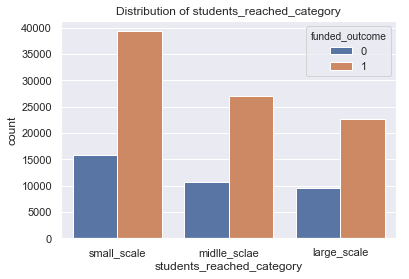

In [7]:
STUDENT_BINS = [1, 30, 100, 15000]
STUDENT_LABELS = ['small_scale', 'midlle_sclae', 'large_scale']

preprocess.discritize(project, 'students_reached', STUDENT_BINS, STUDENT_LABELS)

PRICE_BINS = [90, 600, 2000, 10000, 2000000]
PRICE_LABELS = ['low_cost', 'middle_cost', 'high_cost', 'very_high_cost']

preprocess.discritize(project, 'total_price_including_optional_support', PRICE_BINS, PRICE_LABELS)

project.head()

exploration.plot_count(project, 'students_reached_category', 'funded_outcome')

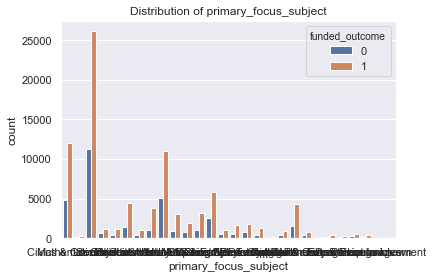

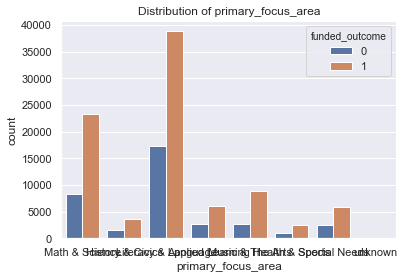

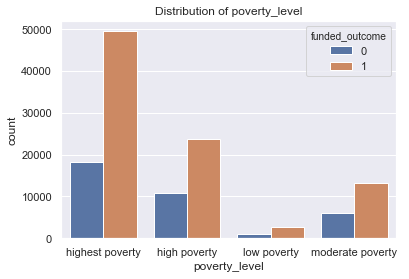

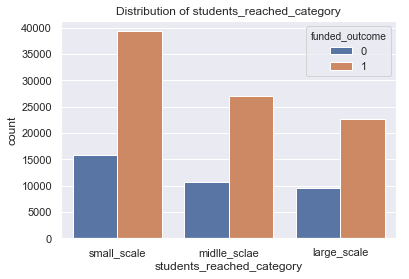

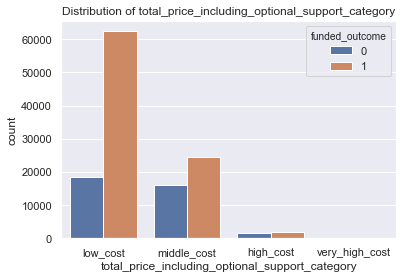

In [8]:
interested_vars = project[['primary_focus_subject', 
                   'primary_focus_area','poverty_level',
                   'students_reached_category',
                   'total_price_including_optional_support_category']]

for var in interested_vars:
    exploration.plot_count(project, var, 'funded_outcome')

for var in interested_vars:
    project = preprocess.get_dummies(project, var)

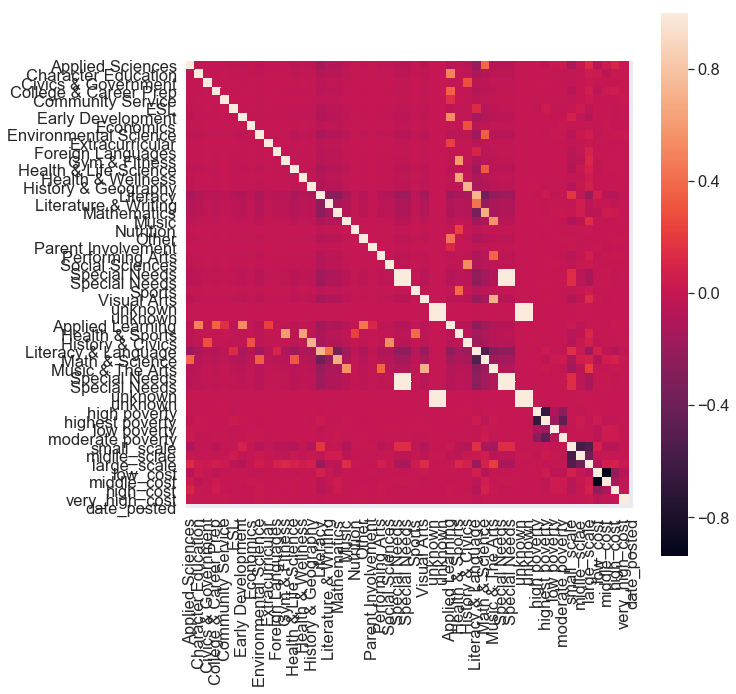

In [11]:
Features = project[['Applied Sciences',
       'Character Education', 'Civics & Government', 'College & Career Prep',
       'Community Service', 'ESL', 'Early Development', 'Economics',
       'Environmental Science', 'Extracurricular', 'Foreign Languages',
       'Gym & Fitness', 'Health & Life Science', 'Health & Wellness',
       'History & Geography', 'Literacy', 'Literature & Writing',
       'Mathematics', 'Music', 'Nutrition', 'Other', 'Parent Involvement',
       'Performing Arts', 'Social Sciences', 'Special Needs', 'Sports',
       'Visual Arts', 'unknown', 'Applied Learning', 'Health & Sports',
       'History & Civics', 'Literacy & Language', 'Math & Science',
       'Music & The Arts', 'Special Needs', 'unknown', 'high poverty',
       'highest poverty', 'low poverty', 'moderate poverty', 'small_scale',
       'midlle_sclae', 'large_scale', 'low_cost', 'middle_cost', 'high_cost',
       'very_high_cost', 'date_posted']]

exploration.plot_heatmap(Features)

# Split the data 
Split the data with a rolling window of 6 moths. So we get three pair of training and testing set. And the training set is growing.

In [9]:
rolling = relativedelta(months=6)
split_period = [pd.Timestamp(2012, 6, 30), pd.Timestamp(2012, 12, 31), pd.Timestamp(2013, 6, 30)]

In [45]:
X = project[['Applied Sciences',
       'Character Education', 'Civics & Government', 'College & Career Prep',
       'Community Service', 'ESL', 'Early Development', 'Economics',
       'Environmental Science', 'Extracurricular', 'Foreign Languages',
       'Gym & Fitness', 'Health & Life Science', 'Health & Wellness',
       'History & Geography', 'Literacy', 'Literature & Writing',
       'Mathematics', 'Music', 'Nutrition', 'Other', 'Parent Involvement',
       'Performing Arts', 'Social Sciences', 'Special Needs', 'Sports',
       'Visual Arts', 'unknown', 'Applied Learning', 'Health & Sports',
       'History & Civics', 'Literacy & Language', 'Math & Science',
       'Music & The Arts', 'Special Needs', 'unknown', 'high poverty',
       'highest poverty', 'low poverty', 'moderate poverty', 'small_scale',
       'midlle_sclae', 'large_scale', 'low_cost', 'middle_cost', 'high_cost',
       'very_high_cost', 'date_posted']]
y = project['funded_outcome'].values

split_results = modeling.split_data(X, y, 0.3, True, 'date_posted', split_period, rolling)

for (X_train, X_test, y_train, y_test) in split_results:
    print("Lenth of training set: {}; lenth of testing set: {}".format(len(X_train), len(X_test)))

Lenth of training set: 26386; lenth of testing set: 32771
Lenth of training set: 59224; lenth of testing set: 21585
Lenth of training set: 80809; lenth of testing set: 44067


# Temporal Validation (Modeling and Evaluation)
First, we need to define the details of models that we want to train data on. 
Second, for each set, we train those models separately. 
Because KNN and SVM are extrmely slow, I only include two of them each.
Thrid, I write the evaluation results into three data frame and report the ones with the best f1 score and auc_roc scores.

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
classifier_dict = {'Logistic Regression':{'solver':['liblinear'], 'penalty':['l1', 'l2'], 'C':[0.1, 10, 100]}, 
                   'K Nearest Neighbors':{'n_neighbors':[7], 'p':[1, 2]}, 
                   'Decision Tree':{'criterion':['gini', 'entropy'], 'max_depth':[7, 15]}, 
                   'Support Vector Machine':{'C':[0.1, 10]},
                  'Random Forest':{'n_estimators':[3, 10], 'max_depth':[9], 'criterion':['entropy', 'gini']},
                  'Bagging':{'base_estimator':[ DecisionTreeClassifier()], 'n_estimators':[3, 10], 'max_samples':[0.6, 0.3]},
                   'Boosting':{'base_estimator':[LogisticRegression()], 'n_estimators':[3, 10], 'learning_rate':[1.0]}}

In [12]:
threshold_list = [1, 2, 5, 10, 20, 30, 50]
col_list = ['model_name', 'parameters', 'baseline', 'accuarcy', 'f1', 'auc_roc',
            'precision_1%', 'precision_2%', 'precision_5%',
            'precision_10%', 'precision_20%', 'precision_30%',
            'precision_50%', 'recall_1%', 'recall_2%',
            'recall_5%', 'recall_10%', 'recall_20%','recall_30%', 'recall_50%' ]

In [13]:
evaluation_result = []
for (X_train, X_test, y_train, y_test) in split_results:
    e_dict = evaluation.wrap_up(classifier_dict, X_train, y_train, X_test, y_test, 95, threshold_list)
    df = evaluation.write_as_df(e_dict, col_list)
    evaluation_result.append(df)

Running Logistic Regression ...
Running Logistic Regression ...
Running Logistic Regression ...
Running Logistic Regression ...
Running Logistic Regression ...
Running Logistic Regression ...
Running K Nearest Neighbors ...
Running K Nearest Neighbors ...
Running Decision Tree ...
Running Decision Tree ...
Running Decision Tree ...
Running Decision Tree ...
Running Support Vector Machine ...
Running Support Vector Machine ...
Running Random Forest ...
Running Random Forest ...
Running Random Forest ...
Running Random Forest ...
Running Bagging ...
Running Bagging ...
Running Bagging ...
Running Bagging ...
Running Boosting ...
Running Boosting ...
Running Logistic Regression ...
Running Logistic Regression ...
Running Logistic Regression ...
Running Logistic Regression ...
Running Logistic Regression ...
Running Logistic Regression ...
Running K Nearest Neighbors ...
Running K Nearest Neighbors ...
Running Decision Tree ...
Running Decision Tree ...
Running Decision Tree ...
Running De

In [14]:
pd.set_option('display.expand_frame_repr', False)
for df in evaluation_result:
    max_f1 = df[df['f1'] == df['f1'].max()]
    max_auc_roc = df[df['auc_roc'] == df['auc_roc'].max()]
    print("Model with the highest f1 score:" + "\n" +
         "classifier: {}".format(max_f1['model_name'].values) + "\n" +
         "parameters: {}".format(max_f1['parameters'].values) + "\n" +
         "f1 score: {}".format(max_f1['f1'].values))
    print()
    print("Model with the highest auc_roc score:" + "\n" +
         "classifier: {}".format(max_auc_roc['model_name'].values) + "\n" +
         "parameters: {}".format(max_auc_roc['parameters'].values) + "\n" +
         "auc_roc score: {}".format(max_auc_roc['auc_roc'].values))
    print()

Model with the highest f1 score:
classifier: ['Logistic Regression']
parameters: ['solver=liblinear, penalty=l1, C=0.1']
f1 score: [0.84235947]

Model with the highest auc_roc score:
classifier: ['Boosting']
parameters: ["base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,\n          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,\n          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,\n          verbose=0, warm_start=False), n_estimators=10, learning_rate=1.0"]
auc_roc score: [0.58824384]

Model with the highest f1 score:
classifier: ['Logistic Regression']
parameters: ['solver=liblinear, penalty=l1, C=0.1']
f1 score: [0.80624504]

Model with the highest auc_roc score:
classifier: ['Random Forest']
parameters: ['n_estimators=3, max_depth=9, criterion=entropy']
auc_roc score: [0.58931038]

Model with the highest f1 score:
classifier: ['Logistic Regression']
parameters: ['solver=liblinear, penalty=l1, C=0.1']
f1

In [18]:
evaluation_result[0]

,model_name,parameters,baseline,accuarcy,f1,auc_roc,precision_1%,precision_2%,precision_5%,precision_10%,precision_20%,precision_30%,precision_50%,recall_1%,recall_2%,recall_5%,recall_10%,recall_20%,recall_30%,recall_50%
0,Logistic Regression,"solver=liblinear, penalty=l1, C=0.1",0.743188,0.733087,0.842359,0.518633,0.880734,0.011825,0.882443,0.023732,0.843101,0.056703,0.841929,0.113283,0.837809,0.225457,0.823721,0.332498,0.809033,0.544282
1,Logistic Regression,"solver=liblinear, penalty=l1, C=10",0.743188,0.565408,0.650417,0.585686,0.868502,0.011661,0.868702,0.023363,0.840659,0.056539,0.841318,0.113201,0.832469,0.224020,0.819347,0.330733,0.808605,0.543995
2,Logistic Regression,"solver=liblinear, penalty=l1, C=100",0.743188,0.565347,0.650368,0.585606,0.859327,0.011538,0.867176,0.023322,0.841270,0.056580,0.841013,0.113160,0.832469,0.224020,0.820771,0.331308,0.808544,0.543954
3,Logistic Regression,"solver=liblinear, penalty=l2, C=0.1",0.743188,0.565286,0.650319,0.585526,0.889908,0.011948,0.880916,0.023691,0.846764,0.056949,0.840098,0.113036,0.832926,0.224143,0.821381,0.331554,0.808483,0.543913
4,Logistic Regression,"solver=liblinear, penalty=l2, C=10",0.743188,0.565408,0.650417,0.585686,0.859327,0.011538,0.867176,0.023322,0.841270,0.056580,0.841013,0.113160,0.832164,0.223938,0.819550,0.330815,0.808605,0.543995
5,Logistic Regression,"solver=liblinear, penalty=l2, C=100",0.743188,0.565408,0.650417,0.585686,0.868502,0.011661,0.870229,0.023404,0.840659,0.056539,0.841013,0.113160,0.832316,0.223979,0.818838,0.330528,0.808605,0.543995
6,K Nearest Neighbors,"n_neighbors=7, p=1",0.743188,0.538006,0.628375,0.549793,0.804281,0.010799,0.825954,0.022213,0.822955,0.055348,0.801953,0.107904,0.798291,0.214822,0.794731,0.320797,0.781202,0.525559
7,K Nearest Neighbors,"n_neighbors=7, p=2",0.743188,0.538006,0.628375,0.549793,0.804281,0.010799,0.825954,0.022213,0.822955,0.055348,0.801953,0.107904,0.798291,0.214822,0.794731,0.320797,0.781202,0.525559
8,Decision Tree,"criterion=gini, max_depth=7",0.743188,0.561319,0.647128,0.580330,0.828746,0.011127,0.847328,0.022788,0.838217,0.056374,0.836436,0.112544,0.834147,0.224471,0.825043,0.333032,0.804516,0.541244
9,Decision Tree,"criterion=gini, max_depth=15",0.743188,0.558878,0.645164,0.577132,0.801223,0.010758,0.806107,0.021679,0.823565,0.055389,0.825145,0.111024,0.832316,0.223979,0.812735,0.328064,0.802075,0.539602


In [15]:
evaluation_result[1]

,model_name,parameters,baseline,accuarcy,f1,auc_roc,precision_1%,precision_2%,precision_5%,precision_10%,precision_20%,precision_30%,precision_50%,recall_1%,recall_2%,recall_5%,recall_10%,recall_20%,recall_30%,recall_50%
0,Logistic Regression,"solver=liblinear, penalty=l1, C=0.1",0.685059,0.683206,0.806245,0.519311,0.809302,0.011767,0.823666,0.024008,0.829472,0.060526,0.813716,0.118753,0.795923,0.232366,0.778378,0.340840,0.760285,0.554879
1,Logistic Regression,"solver=liblinear, penalty=l1, C=10",0.685059,0.575492,0.641776,0.587485,0.804651,0.011699,0.825986,0.024075,0.826691,0.060323,0.809546,0.118144,0.795691,0.232299,0.781776,0.342328,0.760563,0.555082
2,Logistic Regression,"solver=liblinear, penalty=l1, C=100",0.685059,0.575307,0.641620,0.587270,0.804651,0.011699,0.825986,0.024075,0.825765,0.060256,0.809546,0.118144,0.795691,0.232299,0.780849,0.341922,0.760378,0.554947
3,Logistic Regression,"solver=liblinear, penalty=l2, C=0.1",0.685059,0.575585,0.641855,0.587593,0.818605,0.011902,0.821346,0.023940,0.829472,0.060526,0.812326,0.118550,0.796618,0.232569,0.782857,0.342801,0.760656,0.555150
4,Logistic Regression,"solver=liblinear, penalty=l2, C=10",0.685059,0.575585,0.641855,0.587593,0.804651,0.011699,0.825986,0.024075,0.825765,0.060256,0.809082,0.118077,0.795460,0.232231,0.780849,0.341922,0.760656,0.555150
5,Logistic Regression,"solver=liblinear, penalty=l2, C=100",0.685059,0.575492,0.641776,0.587485,0.804651,0.011699,0.825986,0.024075,0.826691,0.060323,0.809082,0.118077,0.795460,0.232231,0.780849,0.341922,0.760563,0.555082
6,K Nearest Neighbors,"n_neighbors=7, p=1",0.685059,0.530924,0.604167,0.535843,0.679070,0.009874,0.709977,0.020694,0.734940,0.053628,0.749768,0.109420,0.737549,0.215324,0.724015,0.317035,0.715993,0.522554
7,K Nearest Neighbors,"n_neighbors=7, p=2",0.685059,0.530924,0.604167,0.535843,0.679070,0.009874,0.709977,0.020694,0.734940,0.053628,0.749768,0.109420,0.737549,0.215324,0.724015,0.317035,0.715993,0.522554
8,Decision Tree,"criterion=gini, max_depth=7",0.685059,0.572620,0.639353,0.584157,0.776744,0.011294,0.793503,0.023128,0.802595,0.058565,0.803058,0.117198,0.796850,0.232637,0.778069,0.340705,0.757691,0.552986
9,Decision Tree,"criterion=gini, max_depth=15",0.685059,0.569377,0.636616,0.580399,0.758140,0.011023,0.763341,0.022249,0.803522,0.058633,0.810936,0.118347,0.793607,0.231690,0.773900,0.338879,0.754448,0.550619


In [16]:
evaluation_result[2]

,model_name,parameters,baseline,accuarcy,f1,auc_roc,precision_1%,precision_2%,precision_5%,precision_10%,precision_20%,precision_30%,precision_50%,recall_1%,recall_2%,recall_5%,recall_10%,recall_20%,recall_30%,recall_50%
0,Logistic Regression,"solver=liblinear, penalty=l1, C=0.1",0.715433,0.711712,0.826897,0.521892,0.865909,0.012085,0.871737,0.024360,0.861099,0.060171,0.839537,0.117328,0.828435,0.231579,0.818381,0.343166,0.799346,0.558632
1,Logistic Regression,"solver=liblinear, penalty=l1, C=10",0.715433,0.583316,0.657170,0.602316,0.863636,0.012053,0.875142,0.024455,0.862460,0.060266,0.841353,0.117582,0.827641,0.231357,0.820121,0.343896,0.798756,0.558220
2,Logistic Regression,"solver=liblinear, penalty=l1, C=100",0.715433,0.583226,0.657095,0.602204,0.863636,0.012053,0.875142,0.024455,0.862460,0.060266,0.844984,0.118089,0.827301,0.231262,0.819818,0.343769,0.798666,0.558157
3,Logistic Regression,"solver=liblinear, penalty=l2, C=0.1",0.715433,0.583407,0.657244,0.602427,0.859091,0.011990,0.879682,0.024582,0.862006,0.060234,0.841126,0.117550,0.827074,0.231199,0.820726,0.344149,0.798847,0.558283
4,Logistic Regression,"solver=liblinear, penalty=l2, C=10",0.715433,0.582908,0.656833,0.601814,0.863636,0.012053,0.875142,0.024455,0.862460,0.060266,0.844984,0.118089,0.827301,0.231262,0.819743,0.343737,0.798348,0.557934
5,Logistic Regression,"solver=liblinear, penalty=l2, C=100",0.715433,0.583180,0.657058,0.602149,0.863636,0.012053,0.875142,0.024455,0.862460,0.060266,0.844984,0.118089,0.827301,0.231262,0.819743,0.343737,0.798620,0.558125
6,K Nearest Neighbors,"n_neighbors=7, p=1",0.715433,0.547326,0.627558,0.558120,0.784091,0.010943,0.785471,0.021949,0.802542,0.056079,0.803223,0.112253,0.790991,0.221112,0.781543,0.327719,0.762765,0.533067
7,K Nearest Neighbors,"n_neighbors=7, p=2",0.715433,0.547326,0.627558,0.558120,0.784091,0.010943,0.785471,0.021949,0.802542,0.056079,0.803223,0.112253,0.790991,0.221112,0.781543,0.327719,0.762765,0.533067
8,Decision Tree,"criterion=gini, max_depth=7",0.715433,0.583725,0.657506,0.602817,0.825000,0.011514,0.834279,0.023313,0.846573,0.059156,0.836360,0.116884,0.827074,0.231199,0.821256,0.344371,0.799165,0.558505
9,Decision Tree,"criterion=gini, max_depth=15",0.715433,0.579549,0.654070,0.597690,0.763636,0.010658,0.795687,0.022235,0.827962,0.057855,0.838402,0.117169,0.820266,0.229296,0.815658,0.342024,0.794989,0.555587


# Analysis of evaluation
First, get the precision-recall curve for each best model.   
Second, get the feature importance from random forests.

In [40]:
(X_train_0, X_test_0, y_train_0, y_test_0) = split_results[0]
(X_train_1, X_test_1, y_train_1, y_test_1) = split_results[1]
(X_train_2, X_test_2, y_train_2, y_test_2) = split_results[2]
best_model_0_f1 = {'Logistic Regression':{'solver':['liblinear'], 'penalty':['l1'], 'C':[0.1]}}
best_model_0_auc = {'Boosting': {'base_estimator':[LogisticRegression()],
                             'n_estimators':[10], 'learning_rate':[1.0]}}
best_model_1_f1 = {'Logistic Regression':{'solver':['liblinear'], 'penalty':['l1'], 'C':[0.1]}}
best_model_1_auc = {'Random Forest':{'n_estimators':[3], 'max_depth':[9], 'criterion':['entropy']}}
best_model_2_f1 = {'Logistic Regression': {'solver':['liblinear'], 'penalty':['l1'], 'C':[0.1]}}
best_model_2_auc = {'Random Forest':{'n_estimators':[10], 'max_depth':[9], 'criterion':['gini']}}

<Figure size 432x288 with 0 Axes>

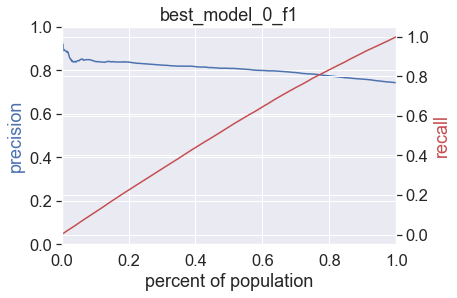

In [33]:
analysis.analysis(best_model_0_f1, 'best_model_0_f1', X_train_0, y_train_0, X_test_0, y_test_0)
analysis.analysis(best_model_0_auc, 'best_model_0_auc', X_train_0, y_train_0, X_test_0, y_test_0)
analysis.analysis(best_model_1_f1, 'best_model_1_f1', X_train_1, y_train_1, X_test_1, y_test_1)
analysis.analysis(best_model_1_auc, 'best_model_1_auc', X_train_1, y_train_1, X_test_1, y_test_1)
analysis.analysis(best_model_2_f1, 'best_model_2_f1', X_train_2, y_train_2, X_test_2, y_test_2)
analysis.analysis(best_model_2_auc, 'best_model_2_auc', X_train_2, y_train_2, X_test_2, y_test_2)

In [42]:
feature_importance_1 = analysis.get_feature_importance(best_model_1_auc, X_train_1, y_train_1)
feature_importance_1

,Features,Importance
48,middle_cost,0.348087
47,low_cost,0.176572
49,high_cost,0.060314
41,highest poverty,0.055240
40,high poverty,0.029946
46,large_scale,0.025187
35,Music & The Arts,0.023379
44,small_scale,0.022504
34,Math & Science,0.022012
8,Environmental Science,0.021187


In [43]:
feature_importance_2 = analysis.get_feature_importance(best_model_2_auc, X_train_2, y_train_2)
feature_importance_2

,Features,Importance
48,middle_cost,0.356285
47,low_cost,0.252839
49,high_cost,0.059641
41,highest poverty,0.051338
34,Math & Science,0.023275
40,high poverty,0.022080
43,moderate poverty,0.020546
8,Environmental Science,0.017842
44,small_scale,0.015336
46,large_scale,0.014667
